In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sT
import altair as alt

from scipy import stats

In [87]:
p_valCut = 0.005
coef_cut = np.log(2)

In [88]:
covar = pd.read_csv("../data_primary/covarExted.csv").set_index("QBB_DUMMY_ID")
alleleFrq = pd.read_csv("../data_primary/AlleleFrequency_protRes_2methods.csv")

In [89]:
covar.head()

,C1,C2,C3,C4,Age_norm,igElevel_norm,Gender
QBB_DUMMY_ID,,,,,,,
SIR000037000001,-0.033373,-0.053692,-0.004076,0.044401,0.333333,0.008640,0.0
SIR000037000002,-0.031802,-0.053499,-0.004858,0.041272,0.320988,0.334848,1.0
SIR000037000003,-0.032826,-0.037701,-0.012267,0.008184,0.308642,0.065818,1.0
SIR000037000004,-0.028249,-0.051060,-0.006859,0.038810,0.358025,0.032518,1.0
SIR000037000005,-0.032370,-0.038965,-0.010919,0.003806,0.308642,0.023981,0.0


In [90]:
alleleAllergenFreq = pd.read_csv("../data_curated/Allele-AllergenFrequency_cutoff34.csv").set_index("allele_allergen")
alleleAllergenFreq.head()

,posFrac_LA,negFrac_LA,posFrac_HD,negFrac_HD,allele,allergen
allele_allergen,,,,,,
fx1_DPA1*02:02,0.041237,0.035714,0.046296,0.034833,fx1,DPA1*02:02
fx2_DPA1*02:02,0.185567,0.190000,0.175926,0.191582,fx2,DPA1*02:02
fx22_DPA1*02:02,0.092784,0.060000,0.092593,0.059507,fx22,DPA1*02:02
fx5_DPA1*02:02,0.134021,0.101429,0.138889,0.100145,fx5,DPA1*02:02
gx2_DPA1*02:02,0.164948,0.108571,0.166667,0.107402,gx2,DPA1*02:02


### Monosensitization.
model1 : allele = C+b1 * allergenPanel + b2 * covariates [Test for 45 allele and 8 panel independently]

1. In total 45*8 (= 360) unique associations, each with covariates.
2. For each association tested, we perform class balancing of minority class and sythesise data with close proximity. 
3. This process has been iterated with boot strapping of 100 x . Final set of associaiton is multiple of boot strapped values
4. Filter for significance with adjusted P-value (<=0.005) and beta (|coef| > log(2)).
5. If the allergen-allele association remianes significane in (n >= 0.75 quartile) iteration, consider the pair as significant.
    ** change to 90% of iteration for consistency across models (date 12/05/2022)
6. Report final assocation as median value.
7. Find common significantr assocaiton in two methods.

In [6]:
p_valCut = 0.005
coef_cut = np.log(2)

mS = pd.read_csv("../AssociationResults_34cutoff/phad_MonoSensitization_Model1_100_09-25-22_12:51:47.csv")
mSDF = mS[(mS.pval_Holm<=p_valCut)&(abs(mS.coef)>coef_cut)] # significant association 

mSDF= mSDF.reset_index().drop(['index','Unnamed: 0'],axis=1)
mSDF['AlleleAllergen'] = mSDF.features+"_"+mSDF.allele

print ("Assocations before filtering: ", mS.groupby("HLA_typing").size())
print ("Associaiton after filtering: ", mSDF.groupby("HLA_typing").size())

Assocations before filtering:  HLA_typing
HLA-HD     13481
HLA-PRG    13498
dtype: int64
Associaiton after filtering:  HLA_typing
HLA-HD     3424
HLA-PRG    3283
dtype: int64


In [7]:
iterSize = mSDF.groupby(['HLA_typing','allele','features']).size().reset_index().rename({0:'successIter'},axis=1)

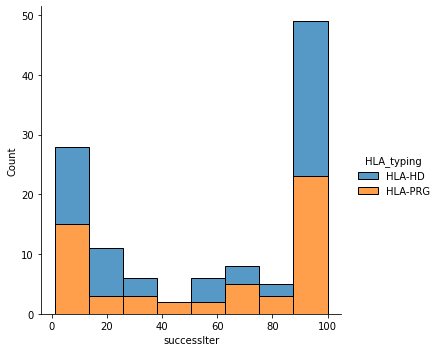

In [8]:
iterSize = mSDF.groupby(['HLA_typing','allele','features']).size().reset_index().rename({0:'successIter'},axis=1)
sns.displot(x='successIter',data=iterSize,hue='HLA_typing',kind="hist",multiple='stack')

In [91]:
iterSize[iterSize.successIter>=98]

,HLA_typing,allele,features,successIter
1,HLA-HD,DPB1*04:02,strongPos,99
5,HLA-HD,DPB1*10:01,weakPos,100
8,HLA-HD,DPB1*17:01,strongPos,99
10,HLA-HD,DQA1*01:03,Negative,98
24,HLA-HD,DQB1*05:03,weakPos,100
26,HLA-HD,DQB1*06:03,Negative,100
27,HLA-HD,DQB1*06:03,strongPos,99
28,HLA-HD,DQB1*06:04,Negative,100
31,HLA-HD,DRB1*01:02,Negative,100
35,HLA-HD,DRB1*04:05,Negative,100


In [10]:
iterSize[iterSize.successIter>=98]

,HLA_typing,allele,features,successIter
1,HLA-HD,DPB1*04:02,strongPos,99
5,HLA-HD,DPB1*10:01,weakPos,100
8,HLA-HD,DPB1*17:01,strongPos,99
10,HLA-HD,DQA1*01:03,Negative,98
24,HLA-HD,DQB1*05:03,weakPos,100
26,HLA-HD,DQB1*06:03,Negative,100
27,HLA-HD,DQB1*06:03,strongPos,99
28,HLA-HD,DQB1*06:04,Negative,100
31,HLA-HD,DRB1*01:02,Negative,100
35,HLA-HD,DRB1*04:05,Negative,100


In [11]:
def getQuantile(sv,qval=0.75):
    print (qval)
    return (sv.quantile(qval))

iterSize.groupby("HLA_typing")["successIter"].apply(getQuantile,qval=0.75)

0.75
0.75


HLA_typing
HLA-HD      99.5
HLA-PRG    100.0
Name: successIter, dtype: float64

In [12]:
successThreshold= 90
def getConS(kgrp):
    if kgrp.HLA_typing.nunique()==2:
        return 'Both'
    else:
        return kgrp.HLA_typing.unique()[0]
    
curatedFilter = iterSize[iterSize.successIter>=successThreshold].groupby(['allele','features']).apply(getConS).reset_index().rename({0:'TypingCons'},axis=1)
curatedFilter.groupby("TypingCons").size()

TypingCons
Both       22
HLA-HD      4
HLA-PRG     1
dtype: int64

In [42]:
curatedFilter

,allele,features,TypingCons
0,DPB1*04:02,strongPos,HLA-HD
1,DPB1*10:01,weakPos,Both
2,DPB1*17:01,strongPos,Both
3,DPB1*17:01,weakPos,HLA-HD
4,DQA1*01:03,Negative,Both
5,DQB1*05:03,weakPos,Both
6,DQB1*06:03,Negative,Both
7,DQB1*06:03,strongPos,Both
8,DQB1*06:04,Negative,Both
9,DRB1*01:02,Negative,Both


In [13]:
iterSize[iterSize.allele=="DRB1*16:01"]

,HLA_typing,allele,features,successIter
57,HLA-HD,DRB1*16:01,Negative,100
58,HLA-HD,DRB1*16:01,weakPos,100
113,HLA-PRG,DRB1*16:01,Negative,83
114,HLA-PRG,DRB1*16:01,weakPos,100


In [14]:
aggCurated = pd.DataFrame()
for k in curatedFilter.index:
    if curatedFilter.loc[k,'TypingCons']=="Both":
        _tmpDF = mSDF[(mSDF.allele==curatedFilter.loc[k,'allele'])&(mSDF.features==curatedFilter.loc[k,'features'])][['coef','[0.025','0.975]','nlog10_Pval']].median().to_frame().T
        _tmpDF['allele'] = curatedFilter.loc[k,'allele']
        _tmpDF['allergenP'] = curatedFilter.loc[k,'features']
        _tmpDF['Typing'] = curatedFilter.loc[k,'TypingCons']
        aggCurated = pd.concat([aggCurated,_tmpDF],axis=0)
    else:
        _tmpDF = mSDF[(mSDF.allele==curatedFilter.loc[k,'allele'])&(mSDF.features==curatedFilter.loc[k,'features'])&(mSDF.HLA_typing==curatedFilter.loc[k,'TypingCons'])]\
                                                    [['coef','[0.025','0.975]','nlog10_Pval']].median().to_frame().T
        _tmpDF['allele'] = curatedFilter.loc[k,'allele']
        _tmpDF['allergenP'] = curatedFilter.loc[k,'features']
        _tmpDF['Typing'] = curatedFilter.loc[k,'TypingCons']
        aggCurated = pd.concat([aggCurated,_tmpDF],axis=0)


In [15]:
aggCurated.head()

,coef,[0.025,0.975],nlog10_Pval,allele,allergenP,Typing
0,-2.42540,-3.1080,-1.7450,5.795326,DPB1*04:02,strongPos,HLA-HD
0,-1.37065,-1.6860,-1.0580,12.173995,DPB1*10:01,weakPos,Both
0,-2.59100,-3.2900,-1.8940,6.858825,DPB1*17:01,strongPos,Both
0,1.03475,0.7175,1.3435,5.010120,DPB1*17:01,weakPos,HLA-HD
0,-1.39100,-1.7550,-1.0270,8.162538,DQA1*01:03,Negative,Both


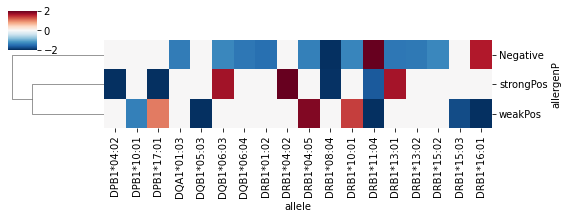

In [16]:
aggCurated = aggCurated.reset_index().drop('index',axis=1)
gxM1 = sns.clustermap(aggCurated.pivot(index='allergenP',columns='allele',values='coef').fillna(0),col_cluster=False,figsize=(8,3),vmin=-2,vmax=2,cmap="RdBu_r")

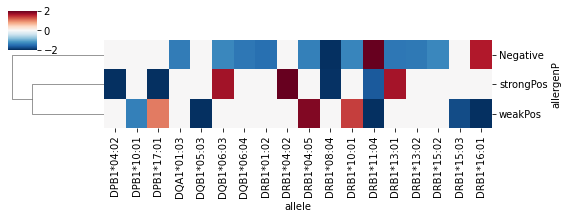

In [17]:
aggCurated = aggCurated.reset_index().drop('index',axis=1)
gxM1 = sns.clustermap(aggCurated.pivot(index='allergenP',columns='allele',values='coef').fillna(0),col_cluster=False,figsize=(8,3),vmin=-2,vmax=2,cmap="RdBu_r")

In [18]:
gxM1.data2d.shape

(3, 18)

In [19]:
colScl = ('#3A912A','#A4DF99','#F7F7F7','#D6BACE','#962A78')
both = alt.Chart(aggCurated[aggCurated.Typing=="Both"]).mark_point(filled=True).encode(
    x=alt.X('allele',sort=list(gxM1.data2d.columns),axis=alt.Axis(labelFontSize=12,title='')),
    y=alt.Y('allergenP',sort=list(gxM1.data2d.index),axis=alt.Axis(labelFontSize=12,title="SensitivityToPhad")),
    color=alt.Color('coef',scale=alt.Scale(domain=[-2,-1,0,1,2],range=colScl,clamp=True)),
    size=alt.Size('nlog10_Pval',legend=alt.Legend(values=[3,5,10],title='-Log(P-value)',titleFontSize=12)),
    tooltip=['allele','coef']
)
anyOne = alt.Chart(aggCurated[aggCurated.Typing!="Both"]).mark_rect(filled=True,size=10).encode(
    x=alt.X('allele',sort=list(gxM1.data2d.columns)),
    y=alt.Y('allergenP',sort=list(gxM1.data2d.index)),
    color=alt.Color('coef',scale=alt.Scale(domain=[-2,-1,0,1,2],range=colScl,clamp=True),legend=alt.Legend(title='\u03b2',titleFontSize=12)),
    size=alt.Size('nlog10_Pval',legend=alt.Legend(values=[3,5,10])),
    tooltip=['allele','coef','Typing','nlog10_Pval']
)
model1_mono = anyOne+both
model1_mono

alt.LayerChart(...)

In [17]:
model1_mono.save("../results_34cutoff/figures/monoSenz_Fig2A_2June2022.html")

In [18]:
model1_mono.save("../results_34cutoff/figures/monoSenz_Fig2A.png")

WARN size dropped as it is incompatible with "rect".


In [20]:
aggCurated[(aggCurated.coef<=-1.5)&(aggCurated.Typing=="Both")].sort_values(by='coef').allele.unique()

array(['DRB1*11:04', 'DPB1*17:01', 'DRB1*16:01', 'DQB1*05:03',
       'DRB1*08:04', 'DRB1*15:03', 'DRB1*01:02'], dtype=object)

In [21]:
aggCurated.groupby("Typing").size()

Typing
Both       22
HLA-HD      4
HLA-PRG     1
dtype: int64

In [22]:
aggCurated.groupby(['Typing','allergenP']).size()

Typing   allergenP
Both     Negative     10
         strongPos     5
         weakPos       7
HLA-HD   Negative      1
         strongPos     2
         weakPos       1
HLA-PRG  Negative      1
dtype: int64

In [23]:
m1DF_Curated = pd.DataFrame()

def valAggregate(kgrp):
    return (kgrp[['iter','coef','[0.025','0.975]','pval_Holm']].agg({'iter':'size','coef':'median','[0.025':'median','0.975]':'median','pval_Holm':'median'}))


for k in curatedFilter.index:
    _allele = curatedFilter.loc[k,'allele']
    _feature = curatedFilter.loc[k,'features']
    dx = mSDF[(mSDF.features==_feature)&(mSDF.allele==_allele)].groupby("HLA_typing").apply(valAggregate).reset_index()
    dx['allele'] = _allele
    dx['features'] = _feature
    m1DF_Curated = pd.concat([m1DF_Curated,dx],axis=0)
    
m1DF_Curated = m1DF_Curated.reset_index().drop('index',axis=1)


In [24]:
m1DF_Curated['test'] = m1DF_Curated.features+"_"+m1DF_Curated.allele
m1DF_Curated_prg = m1DF_Curated[m1DF_Curated.HLA_typing=="HLA-PRG"]
m1DF_Curated_hd = m1DF_Curated[m1DF_Curated.HLA_typing=="HLA-HD"]

In [25]:
m1DF_Curated_hd.head()

,HLA_typing,iter,coef,[0.025,0.975],pval_Holm,allele,features,test
0,HLA-HD,99.0,-2.42540,-3.1080,-1.7450,1.602043e-06,DPB1*04:02,strongPos,strongPos_DPB1*04:02
1,HLA-HD,100.0,-1.34690,-1.6570,-1.0395,1.409018e-12,DPB1*10:01,weakPos,weakPos_DPB1*10:01
3,HLA-HD,99.0,-2.57170,-3.2670,-1.8750,7.111023e-08,DPB1*17:01,strongPos,strongPos_DPB1*17:01
5,HLA-HD,92.0,1.03475,0.7175,1.3435,9.825779e-06,DPB1*17:01,weakPos,weakPos_DPB1*17:01
7,HLA-HD,98.0,-1.35355,-1.7195,-0.9945,1.823863e-08,DQA1*01:03,Negative,Negative_DQA1*01:03


In [26]:
m1DF_Curated_prgX = m1DF_Curated_prg.set_index("test").join(m1DF_Curated_hd.set_index("test"),lsuffix="_LA").sort_values(by='coef')
# m1DF_Curated_prgXAnnot = m1DF_Curated_prgX.join(alleleAllergenFreq.loc[m1DF_Curated_prgX.index][['posFrac_LA','negFrac_LA','posFrac_HD','negFrac_HD']]).sort_values(by=['coef_LA','pval_Holm_LA'])
# m1DF_Curated_prgX.to_csv("../results_34cutoff/tables/Grading_Phad_Monosensitization_sigAnnot.csv")

In [27]:
m1DF_Curated_prgX.columns

Index(['HLA_typing_LA', 'iter_LA', 'coef_LA', '[0.025_LA', '0.975]_LA',
       'pval_Holm_LA', 'allele_LA', 'features_LA', 'HLA_typing', 'iter',
       'coef', '[0.025', '0.975]', 'pval_Holm', 'allele', 'features'],
      dtype='object')

In [28]:
m1DF_Curated_prgXAnnot_curated = m1DF_Curated_prgX[['allele_LA','features_LA','iter_LA','coef_LA','[0.025_LA','0.975]_LA','pval_Holm_LA',
                       'iter','coef','[0.025','0.975]','pval_Holm']]

for k in m1DF_Curated_prgXAnnot_curated.index:
    m1DF_Curated_prgXAnnot_curated.loc[k,'beta_LA'] = "{} ({},{})".format(round(m1DF_Curated_prgXAnnot_curated.loc[k,'coef_LA'],2),
                                                                         round(m1DF_Curated_prgXAnnot_curated.loc[k,'[0.025_LA'],2),
                                                                         round(m1DF_Curated_prgXAnnot_curated.loc[k,'0.975]_LA'],2))
    
    m1DF_Curated_prgXAnnot_curated.loc[k,'beta_HD'] = "{} ({},{})".format(round(m1DF_Curated_prgXAnnot_curated.loc[k,'coef'],2),
                                                                         round(m1DF_Curated_prgXAnnot_curated.loc[k,'[0.025'],2),
                                                                         round(m1DF_Curated_prgXAnnot_curated.loc[k,'0.975]'],2))
m1DF_Curated_prgXAnnot_curated_print = m1DF_Curated_prgXAnnot_curated[['allele_LA','features_LA','iter_LA','beta_LA','pval_Holm_LA','iter','beta_HD','pval_Holm']]
m1DF_Curated_prgXAnnot_curated_print = m1DF_Curated_prgXAnnot_curated_print.fillna(0)

/Users/tkhan/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/tkhan/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [29]:
m1DF_Curated_prgXPV = m1DF_Curated_prgXAnnot_curated_print.pivot(index='allele_LA',columns='features_LA',values='beta_LA')

In [30]:
oldAsso = pd.read_csv("../results_34cutoff/tables/Monosensitization_sigAnnot_2June2022.csv")
oldAsso[oldAsso.features_LA=="phad"][['allele_LA','beta_LA']]

,allele_LA,beta_LA
2,DRB1*11:04,"-3.88 (-4.39,-3.37)"
15,DQB1*05:03,"-1.86 (-2.23,-1.49)"
22,DRB1*16:01,"-1.34 (-1.72,-0.97)"
24,DRB1*13:03,"-1.05 (-1.33,-0.77)"
25,DRB1*04:05,"1.11 (0.8,1.42)"
26,DRB1*01:02,"1.23 (0.94,1.52)"
27,DQB1*06:03,"1.23 (0.89,1.58)"
28,DRB1*15:02,"1.25 (0.91,1.59)"
29,DRB1*10:01,"1.31 (0.98,1.64)"
30,DQA1*01:03,"1.33 (0.96,1.7)"


In [31]:
addGrade = pd.concat([m1DF_Curated_prgXPV,oldAsso[oldAsso.features_LA=="phad"][['allele_LA','beta_LA']].set_index("allele_LA")],axis=1)

In [37]:
addGrade.sort_values(by='beta_LA')

,Negative,strongPos,weakPos,beta_LA
allele_LA,,,,
DRB1*13:03,NaN,NaN,NaN,"-1.05 (-1.33,-0.77)"
DRB1*16:01,"1.27 (0.88,1.66)",NaN,"-2.01 (-2.42,-1.62)","-1.34 (-1.72,-0.97)"
DQB1*05:03,NaN,NaN,"-2.1 (-2.51,-1.7)","-1.86 (-2.23,-1.49)"
DRB1*11:04,"3.3 (2.85,3.74)","-1.68 (-2.21,-1.15)","-4.05 (-4.7,-3.39)","-3.88 (-4.39,-3.37)"
DRB1*04:05,"-1.37 (-1.68,-1.05)",NaN,"1.84 (1.53,2.15)","1.11 (0.8,1.42)"
DQB1*06:03,"-1.3 (-1.63,-0.96)","1.68 (1.2,2.16)",NaN,"1.23 (0.89,1.58)"
DRB1*01:02,"-1.5 (-1.8,-1.21)",NaN,NaN,"1.23 (0.94,1.52)"
DRB1*15:02,"-1.31 (-1.65,-0.96)",NaN,NaN,"1.25 (0.91,1.59)"
DRB1*10:01,"-1.34 (-1.67,-1.0)",NaN,"1.35 (1.01,1.69)","1.31 (0.98,1.64)"


In [93]:
mS.head()

,Unnamed: 0,coef,std err,z,P>|z|,[0.025,0.975],pvalue_raw,features,iter,allele,HLA_typing,pval_Holm,nlog10_Pval
0,0,-0.4294,0.186,-2.315,0.021,-0.793,-0.066,0.020619,Negative,1,DPA1*02:02,HLA-HD,1.0,-0.0
1,1,-0.6788,0.178,-3.819,0.000,-1.027,-0.330,0.000134,Negative,2,DPA1*02:02,HLA-HD,1.0,-0.0
2,2,-0.4850,0.185,-2.628,0.009,-0.847,-0.123,0.008592,Negative,3,DPA1*02:02,HLA-HD,1.0,-0.0
3,3,-0.5822,0.183,-3.187,0.001,-0.940,-0.224,0.001437,Negative,4,DPA1*02:02,HLA-HD,1.0,-0.0
4,4,-0.3437,0.176,-1.952,0.051,-0.689,0.001,0.050981,Negative,5,DPA1*02:02,HLA-HD,1.0,-0.0


In [160]:
tXAllele = pd.DataFrame()

for kname, kgrp in iterSize[iterSize.allele.isin(addGrade.index)].groupby(['features','allele']):#.pivot(index=['allele'],columns=['HLA_typing','features'],values='successIter').loc[addGrade.sort_values(by='beta_LA').index]
    fname= '_'.join(kname)
    tx = mS[(mS.allele==kname[1])]
    for k in ['Negative','weakPos','strongPos']:
        _tmpassoIter = tx[(tx.features==k)&(tx.nlog10_Pval>=2.3)&(abs(tx.coef)>coef_cut)].groupby('HLA_typing').size().mean()
        
        if _tmpassoIter>0:
            _tmpasso = tx[(tx.features==k)&(tx.nlog10_Pval>=2.3)&(abs(tx.coef)>coef_cut)][['coef','[0.025','0.975]','nlog10_Pval']].median().to_frame().T
        else:
            _tmpasso = tx[tx.features==k][['coef','[0.025','0.975]','nlog10_Pval']].median().to_frame().T
        _tmpasso['iterSuccess'] = _tmpassoIter
        _tmpasso['Allele'] = kname[1]
        _tmpasso['Feature'] = k
        tXAllele = pd.concat([tXAllele,_tmpasso]).reset_index().drop('index',axis=1)

In [161]:
tXAllele

,coef,[0.025,0.975],nlog10_Pval,iterSuccess,Allele,Feature
0,-1.39100,-1.7550,-1.0270,8.162538,98.5,DQA1*01:03,Negative
1,0.97090,0.6325,1.3095,2.684059,2.0,DQA1*01:03,weakPos
2,1.68275,1.1180,2.2535,3.250543,56.0,DQA1*01:03,strongPos
3,0.96100,0.6305,1.2945,2.911255,5.0,DQB1*05:03,Negative
4,-2.09100,-2.4915,-1.6910,19.126775,100.0,DQB1*05:03,weakPos
...,...,...,...,...,...,...,...
109,-1.79380,-2.1495,-1.4335,17.163669,100.0,DRB1*15:03,weakPos
110,-0.65100,-1.1515,-0.1625,-0.000000,NaN,DRB1*15:03,strongPos
111,1.44220,1.0540,1.8260,7.531341,91.5,DRB1*16:01,Negative
112,-2.28250,-2.7110,-1.8545,19.868708,100.0,DRB1*16:01,weakPos


In [162]:
tXAllele[tXAllele.iterSuccess<100].sort_values(by=['Feature','coef'])

,coef,[0.025,0.975],nlog10_Pval,iterSuccess,Allele,Feature
0,-1.3910,-1.755,-1.0270,8.162538,98.5,DQA1*01:03,Negative
45,-1.3910,-1.755,-1.0270,8.162538,98.5,DQA1*01:03,Negative
78,-1.3910,-1.755,-1.0270,8.162538,98.5,DQA1*01:03,Negative
24,-1.3212,-1.650,-0.9910,9.536579,99.5,DRB1*10:01,Negative
60,-1.3212,-1.650,-0.9910,9.536579,99.5,DRB1*10:01,Negative
...,...,...,...,...,...,...,...
34,1.0121,0.701,1.3255,4.772535,71.0,DRB1*13:02,weakPos
100,1.0121,0.701,1.3255,4.772535,71.0,DRB1*13:02,weakPos
22,1.0825,0.713,1.4515,2.998602,2.0,DRB1*08:04,weakPos
58,1.0825,0.713,1.4515,2.998602,2.0,DRB1*08:04,weakPos


In [171]:
tXAllelePV = tXAllele.pivot_table(index='Allele',columns='Feature',values=['coef','[0.025','0.975]','nlog10_Pval','iterSuccess'])
allelOrder = ['DRB1*13:03','DRB1*16:01','DQB1*05:03','DPB1*10:01','DRB1*15:03',
'DRB1*11:04','DRB1*04:05','DQB1*06:03','DRB1*10:01','DRB1*13:01',
'DRB1*08:04','DRB1*13:02','DQB1*06:04','DRB1*01:02','DQA1*01:03','DRB1*15:02','DRB1*04:02']
tXAllelePV = tXAllelePV.loc[allelOrder]
tXAllelePV.to_csv("../tables/Phad_gradingAsso_result.csv")

In [172]:
tXAllelePV

0.975]                        [0.025                       \
Feature    Negative    strongPos weakPos Negative    strongPos weakPos   
Allele                                                                   
DRB1*13:03   0.5675      -4.0270 -0.5640   0.0190      -8.5050 -1.1520   
DRB1*16:01   1.8260      -0.2020 -1.8545   1.0540      -1.1165 -2.7110   
DQB1*05:03   1.2945      -1.6450 -1.6910   0.6305      -3.4610 -2.4915   
DPB1*10:01   0.8195      -0.0615 -1.0580   0.1775      -0.9965 -1.6860   
DRB1*15:03   0.2995      -0.1625 -1.4335  -0.3035      -1.1515 -2.1495   
DRB1*11:04   3.7350      -1.1465 -3.4205   2.8585      -2.2180 -4.7165   
DRB1*04:05  -1.0545  173500.0000  2.1680  -1.6805 -173500.0000  1.5360   
DQB1*06:03  -0.9670       2.1660  0.4260  -1.6510       1.2030 -0.2065   
DRB1*10:01  -0.9910      -1.1810  1.7190  -1.6500      -2.3550  1.0375   
DRB1*13:01  -1.0840       2.1470  0.3790  -1.8065       1.1780 -0.2600   
DRB1*08:04  -1.5965      -1.3340  1.4515  -2.4165      -2.6340  0.7130   
DRB1*13:02  -1.0975       0.2960  1.3255  -1.7735      -0.7755  0.7010   
DQB1*06:04  -1.1390       0.1535  1.1430  -1.7595      -0.8875  0.5950   
DRB1*01:02  -1.2060       0.2230  0.6780  -1.7965      -0.6295  0.1415   
DQA1*01:03  -1.0270       2.2535  1.3095  -1.7550       1.1180  0.6325   
DRB1*15:02  -0.8820      -0.9855  1.2510  -1.5710      -2.4595  0.6205   
DRB1*04:02  -0.8280       2.8020  0.2705  -1.5120       1.4660 -0.3845   

               coef                    iterSuccess                    \
Feature    Negative strongPos  weakPos    Negative strongPos weakPos   
Allele                                                                 
DRB1*13:03  0.29570  -6.26590 -0.85755         NaN       3.0    20.0   
DRB1*16:01  1.44220  -0.65825 -2.28250        91.5       NaN   100.0   
DQB1*05:03  0.96100  -2.55290 -2.09100         5.0       1.0   100.0   
DPB1*10:01  0.50165  -0.52420 -1.37065         NaN       NaN   100.0   
DRB1*15:03 -0.00340  -0.65100 -1.79380         NaN       NaN   100.0   
DRB1*11:04  3.29675  -1.68460 -4.06320       100.0      96.0    99.0   
DRB1*04:05 -1.37055 -29.20240  1.84915       100.0       NaN   100.0   
DQB1*06:03 -1.30580   1.68255  0.10995        99.5      99.0     NaN   
DRB1*10:01 -1.32120  -1.77790  1.38095        99.5      15.5   100.0   
DRB1*13:01 -1.44530   1.65810  0.05715       100.0      97.5     NaN   
DRB1*08:04 -2.00835  -1.98360  1.08250       100.0      92.0     2.0   
DRB1*13:02 -1.43485  -0.23605  1.01210       100.0       NaN    71.0   
DQB1*06:04 -1.44960  -0.37380  0.86950       100.0       NaN    70.5   
DRB1*01:02 -1.50125  -0.20670  0.40965       100.0       NaN     NaN   
DQA1*01:03 -1.39100   1.68275  0.97090        98.5      56.0     2.0   
DRB1*15:02 -1.22570  -1.71720  0.93540        76.5       NaN    56.0   
DRB1*04:02 -1.17000   2.12980 -0.05645         1.0      82.5     NaN   

           nlog10_Pval                       
Feature       Negative strongPos    weakPos  
Allele                                       
DRB1*13:03    0.000000  2.370641   3.079868  
DRB1*16:01    7.531341  0.000000  19.868708  
DQB1*05:03    2.911255  2.412794  19.126775  
DPB1*10:01    0.000000  0.000000  12.173995  
DRB1*15:03    0.000000  0.000000  17.163669  
DRB1*11:04   43.151373  4.202457  28.853997  
DRB1*04:05   11.683212  0.000000  25.093399  
DQB1*06:03    8.142423  6.078602   0.000000  
DRB1*10:01    9.536579  3.118853   9.309575  
DRB1*13:01    9.398191  5.663533   0.000000  
DRB1*08:04   16.120043  3.727505   2.998602  
DRB1*13:02   10.889743  0.000000   4.772535  
DQB1*06:04   14.196467  0.000000   4.156247  
DRB1*01:02   17.534183  0.000000   0.000000  
DQA1*01:03    8.162538  3.250543   2.684059  
DRB1*15:02    6.411283  0.229112   3.241309  
DRB1*04:02    5.640585  4.976171   0.000000

In [32]:
addGradeX = addGrade.sort_values(by='beta_LA')

In [54]:
addGradeX[['Negative','beta_LA']].dropna()

,Negative,beta_LA
allele_LA,,
DRB1*16:01,"1.27 (0.88,1.66)","-1.34 (-1.72,-0.97)"
DRB1*11:04,"3.3 (2.85,3.74)","-3.88 (-4.39,-3.37)"
DRB1*04:05,"-1.37 (-1.68,-1.05)","1.11 (0.8,1.42)"
DQB1*06:03,"-1.3 (-1.63,-0.96)","1.23 (0.89,1.58)"
DRB1*01:02,"-1.5 (-1.8,-1.21)","1.23 (0.94,1.52)"
DRB1*15:02,"-1.31 (-1.65,-0.96)","1.25 (0.91,1.59)"
DRB1*10:01,"-1.34 (-1.67,-1.0)","1.31 (0.98,1.64)"
DQA1*01:03,"-1.41 (-1.77,-1.04)","1.33 (0.96,1.7)"
DRB1*13:01,"-1.45 (-1.81,-1.09)","1.36 (1.01,1.73)"


In [55]:
addGradeX.to_csv("../tables/GradingComapreBeta_phad.csv")

In [134]:
m1DF_Curated_prgXAnnot_curated_print.loc[m1DF_Curated_prgXAnnot_curated_print[m1DF_Curated_prgXAnnot_curated_print[['iter_LA','iter']].min(axis=1)>=90].index,'sigType']="High"
m1DF_Curated_prgXAnnot_curated_print.loc[m1DF_Curated_prgXAnnot_curated_print[m1DF_Curated_prgXAnnot_curated_print[['iter_LA','iter']].min(axis=1)<90].index,'sigType']="Low"

In [135]:
m1DF_Curated_prgXAnnot_curated_print.groupby('sigType').size()

sigType
High    30
Low      7
dtype: int64

In [136]:
m1DF_Curated_prgXAnnot_curated_print.tail()

,allele_LA,features_LA,iter_LA,beta_LA,pval_Holm_LA,posFrac_LA,negFrac_LA,iter,beta_HD,pval_Holm,posFrac_HD,negFrac_HD,sigType
test,,,,,,,,,,,,,
phad_DRB1*08:04,DRB1*08:04,phad,100.0,"1.68 (1.31,2.05)",2.072887e-13,0.578947,0.500000,100.0,"1.68 (1.31,2.05)",1.506458e-13,0.578947,0.500000,High
phad_DRB1*13:02,DRB1*13:02,phad,100.0,"1.69 (1.34,2.04)",2.180612e-15,0.633333,0.491180,100.0,"1.7 (1.34,2.06)",2.074230e-15,0.633333,0.491180,High
phad_DQB1*06:04,DQB1*06:04,phad,100.0,"1.8 (1.48,2.14)",1.161315e-21,0.697674,0.490716,100.0,"1.79 (1.46,2.12)",5.974911e-21,0.697674,0.490716,High
wx1_DRB1*01:02,DRB1*01:02,wx1,100.0,"1.88 (1.54,2.23)",5.902904e-21,0.434783,0.259690,100.0,"1.9 (1.55,2.25)",2.699574e-21,0.434783,0.259690,High
fx5_DPB1*04:02,DPB1*04:02,fx5,100.0,"2.52 (1.85,3.19)",2.132294e-08,0.219178,0.117403,0.0,"nan (nan,nan)",0.000000e+00,0.192308,0.122148,Low


In [137]:
m1DF_Curated_prgXAnnot_curated_print.to_csv("../results_34cutoff/tables/Monosensitization_sigAnnot_2June2022.csv")

In [30]:
### For plotting

def gfunction(kgrp):
    _sr = pd.Series((kgrp.coef.mean(),kgrp['[0.025'].mean(),kgrp['0.975]'].mean()
                     ,kgrp['pval_Holm'].mean()),
                    index=('coef','lCI','mCI','pval_Holm'))
    if kgrp['HLA_typing'].nunique()==2:
        _sr['method']='Both'
    else:
        _sr['method']=kgrp['HLA_typing'].unique()[0]
    return (_sr)


m1DF_2methAGG = m1DF_Curated.groupby(['allele','features'])[['coef','[0.025','0.975]','pval_Holm','HLA_typing']].apply(gfunction).reset_index()

In [31]:
m1DF_2methAGG

,allele,features,coef,lCI,mCI,pval_Holm,method
0,DPB1*04:02,fx5,2.521750,1.84900,3.19300,2.132294e-08,HLA-PRG
1,DPB1*09:01,fx2,-2.984675,-3.58125,-2.38525,8.361422e-17,Both
2,DPB1*09:01,gx2,-2.322500,-3.01350,-1.63350,2.477929e-05,Both
3,DPB1*09:01,wx1,-2.590925,-3.07375,-2.10700,5.514703e-20,Both
4,DPB1*10:01,gx2,-3.221525,-4.01875,-2.42800,7.025685e-10,Both
5,DPB1*13:01,wx1,-1.602500,-2.03200,-1.17700,1.299108e-07,Both
6,DPB1*17:01,fx2,-1.546700,-2.01100,-1.07950,2.435335e-04,Both
7,DQA1*01:03,phad,1.322350,0.96050,1.68875,2.409471e-07,Both
8,DQB1*03:03,fx2,-4.481925,-5.41000,-3.54500,7.808784e-16,Both
9,DQB1*03:03,gx2,-2.034675,-2.66400,-1.39875,8.335203e-05,Both


In [70]:
# old association with cut-off

mS_old = pd.read_csv("../AssociationResults_34cutoff/MonoSensitization_Model1_100_06-01-22_10:36:27.csv")
mSDF_old= mS_old[(mS_old.pval_Holm<=p_valCut)&(abs(mS_old.coef)>coef_cut)] # significant association 

mSDF_old= mSDF_old.reset_index().drop(['index','Unnamed: 0'],axis=1)
mSDF_old['AlleleAllergen'] = mSDF_old.features+"_"+mSDF.allele

print ("Assocations before filtering: ", mS_old.groupby("HLA_typing").size())
print ("Associaiton after filtering: ", mSDF_old.groupby("HLA_typing").size())

Assocations before filtering:  HLA_typing
HLA-HD     35642
HLA-PRG    35643
dtype: int64
Associaiton after filtering:  HLA_typing
HLA-HD     5459
HLA-PRG    5372
dtype: int64


In [74]:
mSDF_old_Phad = mSDF_old[mSDF_old.features=="phad"]
mSDF_old_Phad.head()

,coef,std err,z,P>|z|,[0.025,0.975],pvalue_raw,features,iter,allele,HLA_typing,pval_Holm,nlog10_Pval,AlleleAllergen
2,1.0888,0.179,6.095,0.0,0.739,1.439,1.095399e-09,phad,38,DPA1*02:02,HLA-HD,0.000324,3.488850,phad_DPB1*04:02
3,1.1186,0.190,5.889,0.0,0.746,1.491,3.887095e-09,phad,54,DPA1*02:02,HLA-HD,0.001142,2.942397,phad_DPB1*04:02
4,1.0469,0.179,5.836,0.0,0.695,1.398,5.337996e-09,phad,78,DPA1*02:02,HLA-HD,0.001565,2.805561,phad_DPB1*04:02
5,1.0162,0.158,6.445,0.0,0.707,1.325,1.158376e-10,phad,89,DPB1*01:01,HLA-HD,0.000035,4.459112,phad_DPB1*04:02
267,1.0770,0.173,6.218,0.0,0.738,1.417,5.039853e-10,phad,17,DPB1*09:01,HLA-HD,0.000150,3.824040,phad_DPB1*10:01


In [84]:
tXAllele_Old = pd.DataFrame()

for kname, kgrp in iterSize[iterSize.allele.isin(addGrade.index)].groupby('allele'):
    _tmpasso = mSDF_old_Phad[mSDF_old_Phad.allele==kname][['coef','[0.025','0.975]','nlog10_Pval']].median().to_frame().T
    _tmpasso['iterSuccess'] = mSDF_old_Phad[mSDF_old_Phad.allele==kname].shape[0]
    _tmpasso['Allele'] = kname
    tXAllele_Old = pd.concat([tXAllele_Old,_tmpasso]).reset_index().drop('index',axis=1)

In [85]:
tXAllele_Old[tXAllele_Old.iterSuccess<200]

,coef,[0.025,0.975],nlog10_Pval,iterSuccess,Allele
0,-1.04315,-1.3795,-0.7065,3.447334,2,DPB1*10:01
1,NaN,NaN,NaN,NaN,0,DPB1*17:01
2,1.32155,0.9595,1.6855,6.597666,198,DQA1*01:03
4,1.24055,0.9065,1.5810,6.628092,196,DQB1*06:03
7,0.96095,0.6325,1.2895,2.530400,2,DRB1*04:02
8,1.10270,0.7910,1.4150,5.906789,193,DRB1*04:05
12,1.36770,1.0120,1.7230,7.795602,199,DRB1*13:01
14,-1.12380,-1.4080,-0.8340,8.057001,199,DRB1*13:03
15,1.24170,0.8940,1.5840,6.331093,103,DRB1*15:02
16,-1.11075,-1.4370,-0.7785,4.947049,166,DRB1*15:03


### Merging Mono-Panel and Multi-Panel sensitization measure

### Model 3: Sensitivity score and Allele

## Haplotype Associaiton

### Model 2 Haplotypes

In [23]:
## Model 3